<a href="https://colab.research.google.com/github/Ricardo19-art/Investigaci-n-de-Operaciones-/blob/main/EL_PERT_Y_CPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="RoyalBlue"> Modelo de redes - Ruta crítica </font>

### <font color="Green"> Importamos nuestras librerias </font>

##### <font color="pink"> Nos da acceso a todas las funciones de las redes ya antes trabajadas </font>

In [1]:
import networkx as nx
import pandas as pd

##### <font color="pink"> Nos da acceso a todas las funciones esenciales para realizar graficos (titulos, etiquetas, colores, estilos, leyendas, escalas, etc) </font>

In [2]:
import matplotlib.pyplot as plt

##### <font color="pink"> Nos da acceso a todas las funciones para trabajar con datos en filas y columnas, conbinar y agrupar informacion, ademas nos ayuda a generar tablas de datos </font>

In [3]:
import pandas as pd

### <font color="yellow"> Planteamiento del proyecto, con sus respectivas Nodos (actividades) y arcos (duracion) de cada una </font>

##### <font color="orange"> Nuestro Modelo de Red tomara como ejemplo practico la planeacion y construcción de una vivienda </font>

#### <font color="red"> Definiciones clave: </font>

##### <font color="black"> PB = Planta Baja
PA = Planta Alta </font>

In [4]:
#  Nodos de las diferentes actividades y su duraciones en semanas
dur = {
    "A": 2,  # Permisos y licencias
    "B": 3,  # Diseño arquitectónico
    "C": 2,  # Diseño estructural
    "D": 2,  # Topografía y estudio de suelo
    "E": 1,  # Trazo y nivelación
    "F": 2,  # Excavación
    "G": 3,  # Cimentación (zapatas/dados)
    "H": 2,  # Losa de cimentación
    "I": 3,  # Muros planta baja
    "J": 2,  # Columnas y vigas PB
    "K": 2,  # Losa entrepiso
    "L": 3,  # Muros planta alta
    "M": 2,  # Cubierta/techo
    "N": 3,  # Instal. hidrosanitarias PB
    "O": 2,  # Instal. eléctrica PB
    "P": 3,  # Aplanados exteriores
    "Q": 3,  # Aplanados interiores PB
    "R": 2,  # Carpintería/cancel. (puertas/ventanas)
    "S": 2,  # Pisos PB
    "T": 3,  # Instal. hidrosanitarias PA
    "U": 2,  # Instal. eléctrica PA
    "V": 3,  # Aplanados interiores PA
    "W": 2,  # Pisos PA
    "X": 2,  # Pintura exterior
    "Y": 2,  # Pintura interior
    "Z": 1,  # Accesorios exteriores
    "AA": 1, # Accesorios interiores
    "AB": 1, # Limpieza y entrega
}

##### <font color="orange"> Definimos los predecesores inmediatos de cada una de nuestras actividades que deben completarse antes de iniciar la siguiente </font>

In [5]:
# Predecesores inmediatos
preds = {
    "A": [],
    "B": ["A"],
    "C": ["B"],
    "D": ["A"],
    "E": ["D"],
    "F": ["C","E"],
    "G": ["F"],
    "H": ["G"],
    "I": ["H"],
    "J": ["I"],
    "K": ["J"],
    "L": ["K"],
    "M": ["L"],
    "N": ["I"],       # instalaciones PB
    "O": ["I"],       # instalaciones PB
    "P": ["M"],       # aplanados exteriores tras cubierta
    "Q": ["N","O"],   # aplanados interiores PB
    "R": ["M","P","Q"],  # ventanas/puertas tras exteriores e interiores
    "S": ["Q"],       # pisos PB
    "T": ["L"],       # instalaciones PA
    "U": ["L"],       # instalaciones PA
    "V": ["T","U"],   # aplanados interiores PA
    "W": ["V"],       # pisos PA
    "X": ["P","R"],   # pintura exterior tras aplanado ext + cancelería
    "Y": ["R","Q","V"], # pintura interior tras cancelería + aplanados
    "Z": ["X"],       # accesorios exteriores
    "AA":["Y","S","W"], # accesorios interiores al final de acabados
    "AB":["Z","AA"],  # limpieza y entrega
}

##### <font color="orange"> Aqui construimos la red de nuestro proyecto, en el cual cada noso representa una actividad con su respectiva duracion y cuyas aristas representan la relacion de precedencia entre cada una de ellas </font>

###### <font color="red"> Ademas de verificar que nuestro grafo sea aciclico, ya que en el CPM no pueden existir bucles </font>

In [6]:
# Construcción del DAG
G = nx.DiGraph()
for a in dur:
    G.add_node(a, duration=dur[a])
for a, ps in preds.items():
    for p in ps:
        G.add_edge(p, a)

assert nx.is_directed_acyclic_graph(G), "La red debe ser acíclica"
len(G), list(G.nodes())[:5], list(G.edges())[:5]

(28,
 ['A', 'B', 'C', 'D', 'E'],
 [('A', 'B'), ('A', 'D'), ('B', 'C'), ('C', 'F'), ('D', 'E')])

### <font color="Green"> FORWARD PASS
(Recorrido hacia adelante) </font>

##### <font color="orange"> Calculamos los tiempos ES (Early Start) el cual depende completamente del EF (Early Finish) y sus predecesoras: </font>

*   Recorremos nuestro grafo en orden topólogico
*   Determinamos el tiempo más temprano en el que puede iniciar y terminar cada actividas
*   Finalizamos con la obtencion de la duración total de proyecto





#### <font color="red"> Definiciones clave: </font>

##### <font color="black"> ES = Estado de inicio
EF = Estado final </font>

In [7]:
topo = list(nx.topological_sort(G))
ES, EF = {}, {}

for v in topo:
    if G.in_degree(v) == 0:
        ES[v] = 0
    else:
        ES[v] = max(EF[u] for u in G.predecessors(v))
    EF[v] = ES[v] + G.nodes[v]["duration"]

project_duration = max(EF.values())
sinks = [v for v in G.nodes() if G.out_degree(v) == 0]
project_duration, sinks

(35, ['AB'])

### <font color="Green"> BACKWARD PASS
(Recorrido hacia atrán) </font>

##### <font color="orange"> Calculamos los tiempos tardios LF (Late Finish) y el LS (Late Start) con los cuales podemos determinar la holgura de cada actividad y asi identificar la ruta crítica, ademas que las actividades sin holgura determinan la duración total: </font>

*   Partimos de la duracion total del proyecto y recorremos el grafo en orden inverso.
*   Obtenemos el tiempo mas tardeio de cada actividad que pueda iniciar/terminar sin retrasar el proyecto.
*   Calculamos las holguras (Slack) y la ruta crìtica.





#### <font color="red"> Definiciones clave: </font>

##### <font color="black"> LS = Inicio Tardio
LF = Fin Tardio </font>

In [8]:
LS, LF = {}, {}

for v in sinks:
    LF[v] = project_duration
    LS[v] = LF[v] - G.nodes[v]["duration"]

for v in reversed(topo):
    if v in sinks:
        continue
    LF[v] = min(LS[w] for w in G.successors(v))
    LS[v] = LF[v] - G.nodes[v]["duration"]

slack = {v: LS[v] - ES[v] for v in G.nodes()}
crit_nodes = [v for v in G.nodes() if slack[v] == 0]

# Ruta crítica como camino más largo ponderado por duraciones de nodos
H = nx.DiGraph()
for u, v in G.edges():
    H.add_edge(u, v, weight=G.nodes[v]["duration"])
cp_nodes = nx.dag_longest_path(H, weight="weight")

project_duration, crit_nodes, cp_nodes

(35,
 ['A',
  'B',
  'C',
  'F',
  'G',
  'H',
  'I',
  'J',
  'K',
  'L',
  'M',
  'P',
  'R',
  'X',
  'Y',
  'Z',
  'AA',
  'AB'],
 ['A',
  'B',
  'C',
  'F',
  'G',
  'H',
  'I',
  'J',
  'K',
  'L',
  'M',
  'P',
  'R',
  'X',
  'Z',
  'AB'])

##### <font color="orange"> Creamos un diccionario por cada actividad</font>






In [9]:
rows = []
for v in topo:
    rows.append({
        "Act": v,
        "Descripción": {
            "A":"Permisos y licencias","B":"Diseño arquitectónico","C":"Diseño estructural",
            "D":"Topografía/estudio de suelo","E":"Trazo y nivelación","F":"Excavación",
            "G":"Cimentación","H":"Losa de cimentación","I":"Muros PB","J":"Columnas/vigas PB",
            "K":"Losa entrepiso","L":"Muros PA","M":"Cubierta/techo","N":"Inst. HS PB",
            "O":"Inst. eléctrica PB","P":"Aplanados exteriores","Q":"Aplanados interiores PB",
            "R":"Carpintería/cancel.", "S":"Pisos PB","T":"Inst. HS PA","U":"Inst. eléctrica PA",
            "V":"Aplanados interiores PA","W":"Pisos PA","X":"Pintura exterior",
            "Y":"Pintura interior","Z":"Accesorios exteriores","AA":"Accesorios interiores",
            "AB":"Limpieza y entrega"
        }[v],
        "Dur": dur[v],
        "ES": ES[v], "EF": EF[v], "LS": LS[v], "LF": LF[v],
        "Holgura": slack[v],
        "Crítica": "Sí" if slack[v]==0 else "No"
    })

tabla = pd.DataFrame(rows).set_index("Act")
tabla.sort_values("ES")

,Descripción,Dur,ES,EF,LS,LF,Holgura,Crítica
Act,,,,,,,,
A,Permisos y licencias,2,0,2,0,2,0,Sí
B,Diseño arquitectónico,3,2,5,2,5,0,Sí
D,Topografía/estudio de suelo,2,2,4,4,6,2,No
E,Trazo y nivelación,1,4,5,6,7,2,No
C,Diseño estructural,2,5,7,5,7,0,Sí
F,Excavación,2,7,9,7,9,0,Sí
G,Cimentación,3,9,12,9,12,0,Sí
H,Losa de cimentación,2,12,14,12,14,0,Sí
I,Muros PB,3,14,17,14,17,0,Sí


##### <font color="orange"> Convertimos rows en un DataFrame de pandas, con el incide "Act" para agrupar por terminos de inicio para graficarlos:</font>






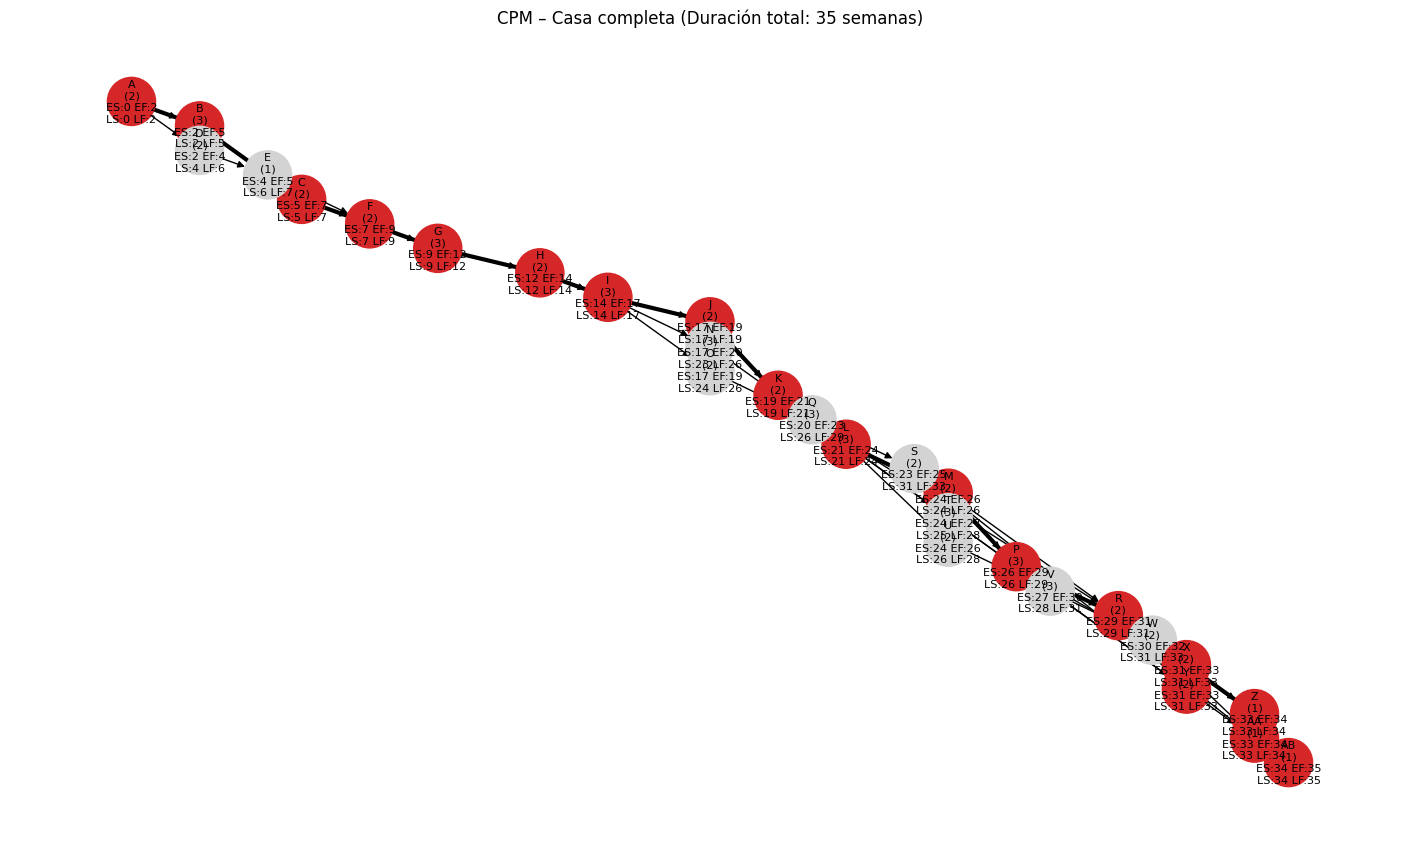

In [10]:
plt.figure(figsize=(14,8))

# Colocación: eje x ~ ES; eje y para separar
levels = {}
for v in topo:
    levels.setdefault(ES[v], []).append(v)

pos = {}
y = 0
for es in sorted(levels.keys()):
    for v in levels[es]:
        pos[v] = (es, -y)
        y += 1

node_colors = ["tab:red" if slack[v]==0 else "lightgray" for v in G.nodes()]
nx.draw(G, pos, node_color=node_colors, node_size=1200, with_labels=False, arrows=True)

# Etiquetas compactas
labels = {v: f"{v}\n({dur[v]})\nES:{ES[v]} EF:{EF[v]}\nLS:{LS[v]} LF:{LF[v]}" for v in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8)

# Arcos de la ruta crítica
cp_edges = list(zip(cp_nodes[:-1], cp_nodes[1:]))
nx.draw_networkx_edges(G, pos, edgelist=cp_edges, width=3)

plt.title(f"CPM – Casa completa (Duración total: {project_duration} semanas)")
plt.axis("off")
plt.show()